In [520]:
!pip install scikit-plot

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,precision_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [322]:
filepath="https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv"
data=pd.read_csv(filepath)

In [323]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [325]:
## We will check the missing value in the data
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

### As there is no missing value the dataset

In [326]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### As we find that mean,min and all the quartile are looking perfect so we will plot the dataset to check the skewness and outliers

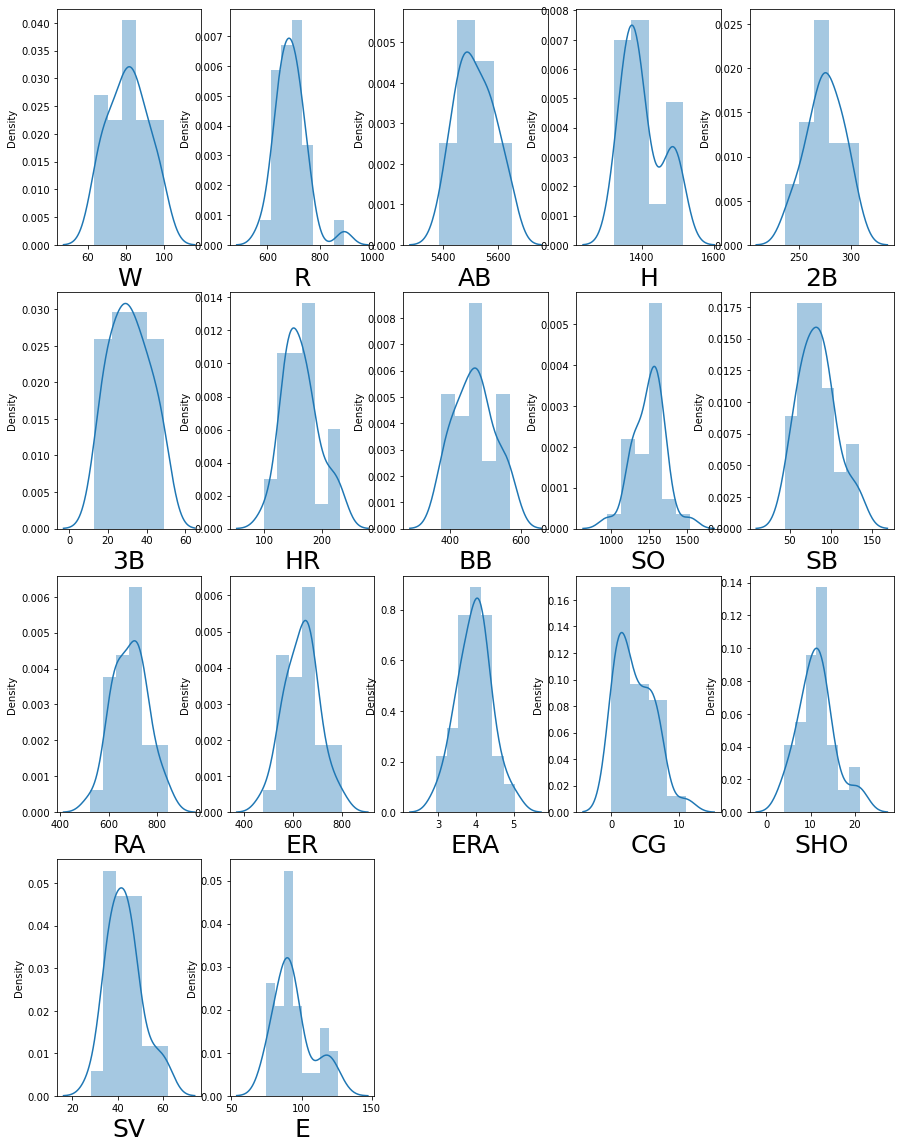

In [327]:
# It will visualize the data distribution through the distribution Plot

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in data:
    if plotnumber<=17:
        
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

### Now we will correlate the features with the target column i.e Win

In [328]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

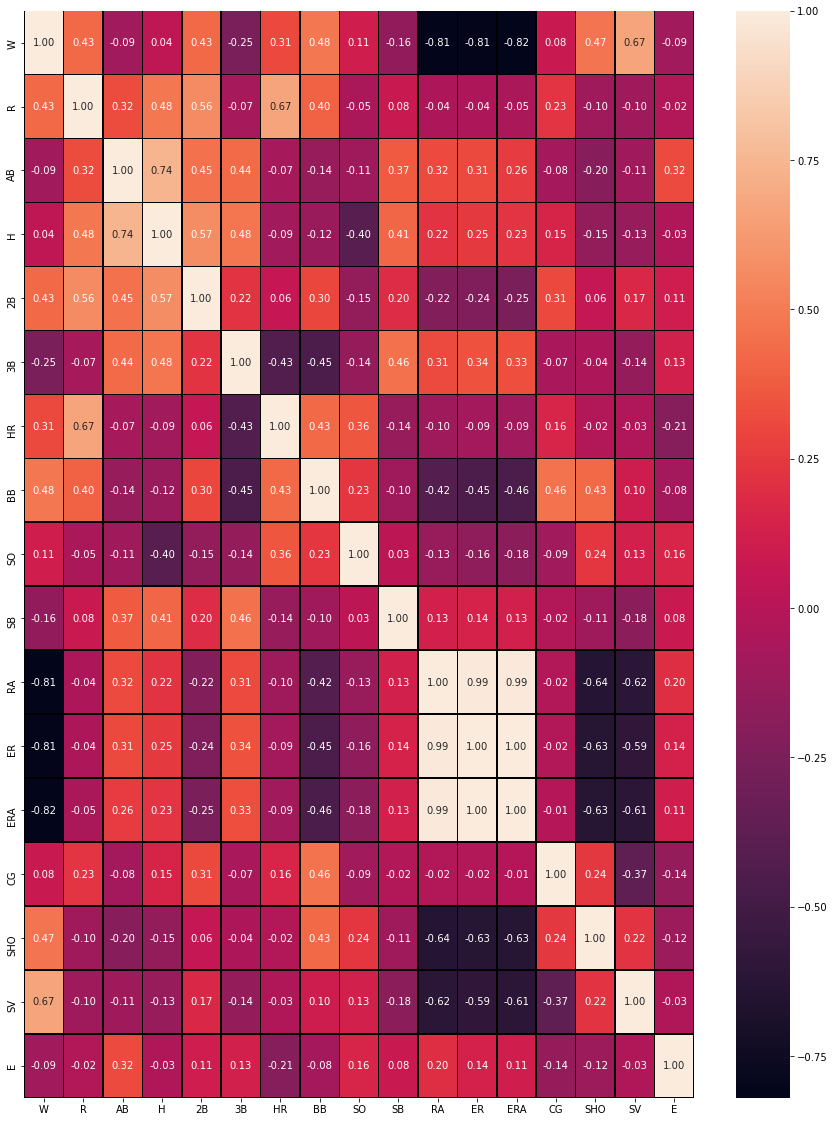

In [329]:
#we can visualize this correlation between then using heatmap

plt.figure(figsize=(15,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

### Highest correlation is with the Saves(SV),Runs(R) and the Shutouts(SHO) and the least correlation is with the RunAllowded(RA),Earned Runs(ER)and the Earned Run Average(ERA)

## Now We are Correlating every features with the target column i.e Win

In [330]:
data[['R', 'W']].groupby(['R'], as_index=False).mean().sort_values(by='W', ascending=False)

,R,W
6,647,100.0
17,697,98.0
21,724,95.0
27,891,93.0
11,667,92.0
13,683,90.0
25,751,88.0
26,764,87.0
22,729,86.0
14,689,85.5


In [331]:
data[['AB', 'W']].groupby(['AB'], as_index=False).mean().sort_values(by='W', ascending=False)

,AB,W
10,5484,100.0
26,5631,98.0
12,5491,97.0
23,5575,95.0
13,5509,93.0
0,5385,92.0
15,5527,90.0
14,5511,88.0
20,5567,87.0
6,5459,86.0


In [332]:
data[['H', 'W']].groupby(['H'], as_index=False).mean().sort_values(by='W', ascending=False)

,H,W
15,1386,100.0
21,1462,98.0
2,1341,97.0
27,1497,95.0
23,1480,93.0
3,1346,92.0
5,1351,90.0
19,1419,88.0
17,1397,87.0
1,1331,85.0


In [333]:
data[['2B', 'W']].groupby(['2B'], as_index=False).mean().sort_values(by='W', ascending=False)

,2B,W
16,292,98.000000
19,300,95.000000
21,308,93.000000
7,263,92.000000
14,288,92.000000
18,295,90.000000
13,279,88.000000
1,243,85.000000
8,265,83.000000
12,278,83.000000


In [334]:
data[['3B', 'W']].groupby(['3B'], as_index=False).mean().sort_values(by='W', ascending=False)

,3B,W
10,30,97.000000
18,42,95.000000
16,39,92.000000
1,17,91.500000
7,26,89.000000
3,19,87.000000
5,21,85.000000
11,32,84.000000
19,44,83.000000
0,13,83.000000


In [335]:
data[['HR', 'W']].groupby(['HR'], as_index=False).mean().sort_values(by='W', ascending=False)

,HR,W
4,137,100.0
6,140,98.0
16,171,97.0
5,139,95.0
26,232,93.0
21,187,92.0
17,172,88.0
23,212,87.0
19,177,86.5
25,230,86.0


In [336]:
data[['BB', 'W']].groupby(['BB'], as_index=False).mean().sort_values(by='W', ascending=False)

,BB,W
22,506,100
13,461,98
27,567,97
1,383,95
28,570,93
26,563,92
18,488,90
21,503,88
25,554,87
17,486,86


In [337]:
data[['SO', 'W']].groupby(['SO'], as_index=False).mean().sort_values(by='W', ascending=False)

,SO,W
15,1267,100
22,1322,98
28,1518,97
0,973,95
5,1151,93
12,1258,92
18,1290,90
10,1233,88
8,1227,87
27,1392,86


In [338]:
data[['SB', 'W']].groupby(['SB'], as_index=False).mean().sort_values(by='W', ascending=False)

,SB,W
20,98,98
18,95,97
22,104,95
4,59,92
1,51,90
21,101,88
5,63,87
24,121,86
2,52,85
17,93,84


In [339]:
data[['RA', 'W']].groupby(['RA'], as_index=False).mean().sort_values(by='W', ascending=False)

,RA,W
0,525,100
2,596,98
3,608,97
9,641,95
11,670,93
1,595,92
4,613,90
22,733,88
15,698,87
5,618,86


In [340]:
data[['ER', 'W']].groupby(['ER'], as_index=False).mean().sort_values(by='W', ascending=False)

,ER,W
0,478,100
1,532,98
2,546,97
9,601,95
11,609,93
3,553,92
4,557,90
22,680,88
16,652,87
5,572,86


In [341]:
data[['ERA', 'W']].groupby(['ERA'], as_index=False).mean().sort_values(by='W', ascending=False)

,ERA,W
0,2.94,100
1,3.21,98
2,3.36,97
9,3.73,95
11,3.80,93
4,3.44,92
3,3.43,90
22,4.24,88
15,4.03,87
5,3.57,86


In [342]:
data[['SHO', 'W']].groupby(['SHO'], as_index=False).mean().sort_values(by='W', ascending=False)

,SHO,W
11,21,94.500000
8,14,90.000000
7,13,89.000000
9,15,84.000000
10,18,84.000000
4,9,82.000000
5,10,80.000000
3,8,79.500000
6,12,78.285714
0,4,77.500000


In [343]:
data[['SV', 'W']].groupby(['SV'], as_index=False).mean().sort_values(by='W', ascending=False)

,SV,W
19,62,100.000000
16,54,98.000000
17,56,95.000000
1,34,93.000000
13,47,92.000000
14,48,92.000000
15,50,90.000000
6,39,86.000000
12,46,85.000000
11,45,82.333333


In [344]:
data[['E', 'W']].groupby(['E'], as_index=False).mean().sort_values(by='W', ascending=False)

,E,W
12,96,100.000000
19,122,98.000000
15,111,97.000000
6,88,92.666667
0,75,92.000000
18,119,88.000000
4,85,86.000000
9,93,86.000000
2,78,84.000000
3,79,81.000000


In [345]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

### Removing Outlier using Z score

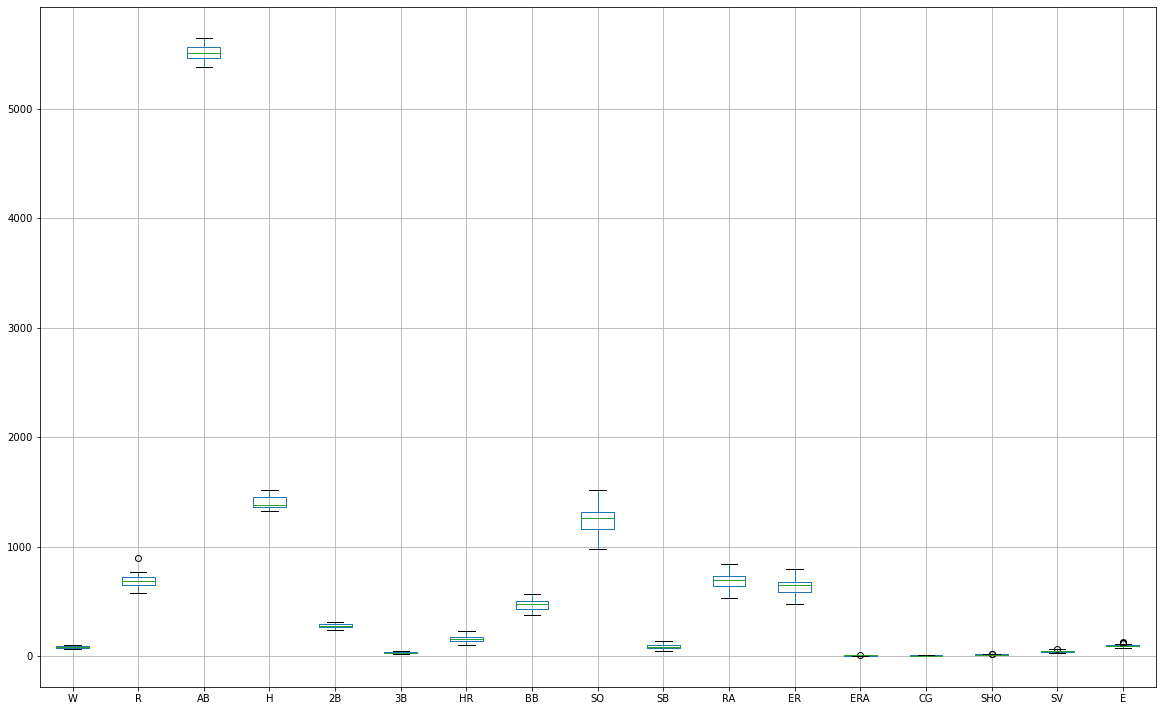

In [346]:
data.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=-0.30)
plt.show()

In [347]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(30, 17)
(29, 17)


### Data Loss in percentage

In [348]:
loss_percent=(30-29)/30*100
print(loss_percent)

3.3333333333333335


In [349]:
data_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [400]:
data_new['ERA'] = data_new['ERA'].astype(int)

In [401]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W       29 non-null     int64
 1   R       29 non-null     int64
 2   AB      29 non-null     int64
 3   H       29 non-null     int64
 4   2B      29 non-null     int64
 5   3B      29 non-null     int64
 6   HR      29 non-null     int64
 7   BB      29 non-null     int64
 8   SO      29 non-null     int64
 9   SB      29 non-null     int64
 10  RA      29 non-null     int64
 11  ER      29 non-null     int64
 12  ERA     29 non-null     int32
 13  CG      29 non-null     int64
 14  SHO     29 non-null     int64
 15  SV      29 non-null     int64
 16  E       29 non-null     int64
dtypes: int32(1), int64(16)
memory usage: 4.0 KB


### Now we will divide the dataset into features as 'X' and label as 'Y'

In [402]:
x=data_new.drop(columns='W')
y=data_new['W']

In [415]:
x.shape

(29, 16)

In [416]:
y.shape

(29,)

### Splitting the dataframes into train_test_split

In [434]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20,random_state=13)

In [435]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23, 16)
(6, 16)
(23,)
(6,)


### Finding the Best Model

In [467]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [468]:
Y_pred_train = lr.predict(x_train)

In [469]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, Y_pred_train))

Coefficients: [ 1.94220249e-01  2.11270347e-02 -5.87967525e-02 -8.82877187e-02
 -1.40148307e-02 -8.82881494e-02 -2.06391034e-02  1.81855339e-03
 -5.50133943e-04  1.91135963e-01 -1.70014450e-01 -8.00073273e+00
  9.03714930e-01  4.61095880e-01  8.55759167e-01 -1.05209725e-01]
Intercept: -70.79899031077147
Mean squared error (MSE): 3.81
Coefficient of determination (R^2): 0.96


In [471]:
lr.score(x_train,y_train)

0.9641312667160895

In [477]:
from sklearn.linear_model import  Ridge,RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(x,y)
ridgecv.alpha_
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x,y)
ridge_model=ridge_model.score(x,y)
ridge_model

0.9450705226995527

In [478]:
predict_rcv=ridgecv.predict(x)

In [479]:
print('Coefficients:', ridgecv.coef_)
print('Intercept:', ridgecv.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, predict_rcv))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, predict_rcv))

Coefficients: [ 1.34446983e-01 -2.30238300e-04 -2.40457462e-03 -1.16165915e-01
 -4.94557167e-03 -5.02062835e-02 -2.41120708e-02  1.01322216e-03
 -1.14924251e-03  1.27524545e-01 -1.98661530e-01 -2.96726562e-01
  8.12013696e-01  3.41132916e-01  7.34657942e-01 -2.26787253e-02]
Intercept: 47.08572990080883
Mean squared error (MSE): 5.72
Coefficient of determination (R^2): 0.95


In [480]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(x,y)
predict_r=r.predict(x)
r.score(x,y)


0.9474212001135041

In [481]:
print('Coefficients:', r.coef_)
print('Intercept:', r.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, predict_r))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, predict_r))

Coefficients: [ 1.48470374e-01  2.85955608e-03 -9.07675685e-03 -1.40514977e-01
  1.21115004e-03 -5.99047940e-02 -2.52355006e-02  1.43581705e-03
  5.75466691e-03  1.52513380e-01 -2.06030917e-01 -2.35138121e+00
  8.48933109e-01  3.74251230e-01  7.67287054e-01 -3.91733415e-02]
Intercept: 31.70448017673742
Mean squared error (MSE): 5.47
Coefficient of determination (R^2): 0.95


In [482]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.01)
l.fit(x,y)
predict_l=l.predict(x)
l.score(x,y)


0.947400065843882

In [483]:
print('Coefficients:', l.coef_)
print('Intercept:', l.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, predict_l))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, predict_l))

Coefficients: [ 1.47589839e-01  2.73823184e-03 -8.73987220e-03 -1.38983491e-01
  4.82434270e-04 -5.95412373e-02 -2.51895339e-02  1.45429344e-03
  5.25424939e-03  1.49834154e-01 -2.04558691e-01 -2.20962028e+00
  8.49749065e-01  3.71021938e-01  7.65443060e-01 -3.78882614e-02]
Intercept: 32.441465861571814
Mean squared error (MSE): 5.48
Coefficient of determination (R^2): 0.95


In [489]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x,y)
predict_dtr=dtr.predict(x)
dtr.score(x,y)

1.0

In [490]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, predict_dtr))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, predict_dtr))

Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00


In [491]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x,y)
predict_rf=rf.predict(x)
rf.score(x,y)

0.9454266343825667

In [492]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, predict_rf))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, predict_rf))

Mean squared error (MSE): 5.68
Coefficient of determination (R^2): 0.95


In [493]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x,y)
predict_ada=ada.predict(x)
ada=ada.score(x,y)
ada

0.9868204455404581

In [494]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, predict_ada))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, predict_ada))

Mean squared error (MSE): 1.37
Coefficient of determination (R^2): 0.99


In [497]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x,y)
predict_gbr=gbr.predict(x)
gbr.score(x,y)


0.9999995007298832

In [496]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, predict_gbr))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, predict_gbr))

Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00


### HyperParameter Tunning

In [498]:
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.01)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]
gs=GridSearchCV(gbr,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=7,
                                                 n_estimators=200),
             param_grid=[{'max_features': [8, 10, 15, 18],
                          'max_leaf_nodes': [3, 5, 7, 9],
                          'min_samples_split': [5, 9, 13]}],
             scoring='neg_mean_squared_error')

In [499]:
best_model=gs.best_estimator_
best_model

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=8,
                          max_leaf_nodes=3, min_samples_split=9,
                          n_estimators=200)

In [500]:
modgb=GradientBoostingRegressor()
modgb=GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=8,
                          max_leaf_nodes=3, min_samples_split=9,
                          n_estimators=200)
modgb.fit(x_train,y_train)
pred=modgb.predict(x_test)
print(r2_score(y_test,pred))

0.7623286331937863


### Predicting Win for the Next Year

In [513]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4,5,9,45,119


In [514]:
predict_win=pd.get_dummies(x.iloc[:,0:29])

In [515]:
predict_win.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4,7,12,35,86


In [516]:
gbr.fit(x_train,y_train)
predict=gbr.predict(predict_win)

In [517]:
print(predict)

[92.93205284 77.85389544 80.80776829 76.47766667 74.74562602 86.00389024
 80.80776829 79.94174797 78.1881097  86.86991057 85.13786992 84.27184959
 76.47766667 69.54950407 97.26215447 94.56595789 94.66409349 69.54950407
 66.08542277 88.60195122 82.53980894 80.24781006 68.68348374 65.21940244
 90.05367705 91.34778787 79.07572764 74.74562602 69.54950407]


In [518]:
predict_win['Predict Win']=predict
predict_win

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,Predict Win
0,724,5575,1497,300,42,139,383,973,104,641,601,3,2,8,56,88,92.932053
1,696,5467,1349,277,44,156,439,1264,70,700,653,4,2,12,45,86,77.853895
2,669,5439,1395,303,29,141,533,1157,86,640,584,3,11,10,38,79,80.807768
3,622,5533,1381,260,27,136,404,1231,68,701,643,3,7,9,37,101,76.477667
4,689,5605,1515,289,49,151,455,1259,83,803,746,4,7,12,35,86,74.745626
6,764,5567,1397,272,19,212,554,1227,63,698,652,4,3,4,48,93,86.003890
7,713,5485,1370,246,20,217,418,1331,44,693,646,4,0,10,43,77,80.807768
8,644,5485,1383,278,32,167,436,1310,87,642,604,3,1,12,60,95,79.941748
9,748,5640,1495,294,33,161,478,1148,71,753,694,4,3,10,40,97,78.188110
10,751,5511,1419,279,32,172,503,1233,101,733,680,4,5,9,45,119,86.869911


### Saving The Model

In [519]:
import joblib
joblib.dump(modgb,"BaseballEvaluation.pkl")

['BaseballEvaluation.pkl']